<a href="https://colab.research.google.com/github/Meena-30/Car-price-prediction/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To supress warnings
%precision 2
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('/content/car price dataset.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
print('Information abount the dataframe')
print(df.info())

Information abount the dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 611.4+ KB
None


In [ ]:
print('Statistical values of dataframe')
print(df.describe())

Statistical values of dataframe
        Unnamed: 0         Year  Kilometers_Driven        Seats        Price
count  6019.000000  6019.000000       6.019000e+03  5977.000000  6019.000000
mean   3009.000000  2013.358199       5.873838e+04     5.278735     9.479468
std    1737.679967     3.269742       9.126884e+04     0.808840    11.187917
min       0.000000  1998.000000       1.710000e+02     0.000000     0.440000
25%    1504.500000  2011.000000       3.400000e+04     5.000000     3.500000
50%    3009.000000  2014.000000       5.300000e+04     5.000000     5.640000
75%    4513.500000  2016.000000       7.300000e+04     5.000000     9.950000
max    6018.000000  2019.000000       6.500000e+06    10.000000   160.000000


In [ ]:
#adding the column age of car
df['Current_year']=2022
df['Ageofcar']=df['Current_year']-df['Year']
df.drop('Current_year',axis=1,inplace=True)
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Ageofcar,Brand,Model
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,12,Maruti,WagonR
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,7,Hyundai,Creta1.6
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,11,Honda,JazzV
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,10,Maruti,ErtigaVDI
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,9,Audi,A4New


In [ ]:
#split the name of the car into brand and model

df['Brand'] = df['Name'].str.split(' ').str[0] #Separating Brand name from the Name
df['Model'] = df['Name'].str.split(' ').str[1] + df['Name'].str.split(' ').str[2]

In [ ]:
#unique values in brand
df.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [ ]:
# removing kmpl or km/kg
df['Mileage']=df['Mileage'].str.replace(r'[^0-9.]','')

In [ ]:
#remove cc
df['Engine']=df['Engine'].str.replace(r'[^0-9]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
#remove bhp
df['Power']=df['Power'].str.replace(r'[^0-9]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
#replace space with nan
df['Power'].replace('',np.NaN,inplace=True)

In [ ]:
df["Fuel_Type"] = df["Fuel_Type"].astype("category") # Convert the object datatype columns to category datatype
df["Transmission"] = df["Transmission"].astype("category")
df["Owner_Type"] = df["Owner_Type"].astype("category")
#converting object datatype to float
df["Mileage"] = df["Mileage"].astype(float)
df["Power"] = df["Power"].astype(float)
df["Engine"]=df["Engine"].astype(float)

In [ ]:
#fill null values with median obtained from respective group (name,year)

df['Engine']=df.groupby(['Name','Year'])['Engine'].apply(lambda x:x.fillna(x.median()))
df['Power']=df.groupby(['Name','Year'])['Power'].apply(lambda x:x.fillna(x.median()))
df['Mileage']=df.groupby(['Name','Year'])['Mileage'].apply(lambda x:x.fillna(x.median()))

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/p

In [ ]:
#calculate null values
col=['Engine','Power','Mileage']
df[col].isnull().sum()

Engine      35
Power      132
Mileage      2
dtype: int64

In [ ]:
#fill null values with median obtained from respective group (brand,year)
df['Engine']=df.groupby(['Brand','Model'])['Engine'].apply(lambda x:x.fillna(x.median()))

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
df['Power']=df.groupby(['Brand','Model'])['Power'].apply(lambda x:x.fillna(x.median()))

In [ ]:
df['Mileage']=df.groupby(['Brand','Model'])['Mileage'].apply(lambda x:x.fillna(x.median()))

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
df['Seats']=df.groupby(['Name'])['Seats'].apply(lambda x:x.fillna(x.median()))

In [ ]:
df['Seats']=df.groupby(['Model'])['Seats'].apply(lambda x:x.fillna(x.median()))

In [ ]:
df['Seats']=df['Seats'].fillna(5)

In [ ]:
#change location and brand data types to category
df["Location"] = df["Location"].astype("category")
df['Brand'] =df['Brand'].astype("category")

In [ ]:
df[col].isnull().sum()

Engine     14
Power      52
Mileage     2
dtype: int64

In [ ]:
#fill rest of all columns with median
cols1 = ["Power","Mileage","Engine"]

for ii in cols1:
    df[ii] = df[ii].fillna(df[ii].median())

In [ ]:
#all null values filed
df.isnull().sum()


Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Ageofcar             0
Brand                0
Model                0
dtype: int64

In [ ]:
# creating 2 lists low brands and high brands
Low=['Maruti', 
     'Hyundai',
     'Ambassdor',
     'Hindustan',
     'Force',
     'Chevrolet',
     'Fiat',
     'Tata',
     'Smart',
     'Renault',
     'Datsun',
     'Mahindra',
     'Skoda',
     'Ford',
     'Toyota',
     'Isuzu',
     'Mitsubishi','Honda']

High=['Audi',
      'Mini Cooper',
      'Bentley',
      'Mercedes-Benz',
      'Lamborghini',
      'Volkswagen',
      'Porsche',
      'Land Rover',
      'Nissan',
      'Volvo',
      'Jeep',
      'Jaguar',
      'BMW']

In [ ]:
def classrange(x):
    if x in Low:
        return "Low"
    elif x in High:
        return "High"
    else: 
        return x

In [ ]:
df['Brand_Class'] = df['Brand'].apply(lambda x: classrange(x))

In [ ]:
df['Engine']=df['Engine'].astype(int)
df['Brand_Class']=df["Brand_Class"].astype('category')

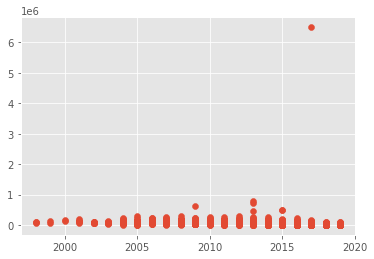

In [ ]:
x=df['Year']
y=df['Kilometers_Driven']
plt.scatter(x,y)

In [ ]:
# from above plot there is an outlier above 6000000 so remove it

In [ ]:
df=df[df['Kilometers_Driven']<6000000]

In [ ]:
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price', 'Ageofcar', 'Brand', 'Model', 'Brand_Class'],
      dtype='object')

In [ ]:
#remove some independent variables from dataframe
df.drop(['Name','Model','Year','Brand'],axis=1,inplace=True)

In [ ]:
#Store all features on which the price of car depends in X
X = df.drop(["Price"],axis=1)
#dependent variable is price store it in y
y = df[["Price"]]

In [ ]:
X

,Unnamed: 0,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Ageofcar,Brand_Class
0,0,Mumbai,72000,CNG,Manual,First,26.60000,998,5816.00000,5.00000,12,Low
1,1,Pune,41000,Diesel,Manual,First,19.67000,1582,1262.00000,5.00000,7,Low
2,2,Chennai,46000,Petrol,Manual,First,18.20000,1199,887.00000,5.00000,11,Low
3,3,Chennai,87000,Diesel,Manual,First,20.77000,1248,8876.00000,7.00000,10,Low
4,4,Coimbatore,40670,Diesel,Automatic,Second,15.20000,1968,1408.00000,5.00000,9,High
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Delhi,27365,Diesel,Manual,First,28.40000,1248,74.00000,5.00000,8,Low
6015,6015,Jaipur,100000,Diesel,Manual,First,24.40000,1120,71.00000,5.00000,7,Low
6016,6016,Jaipur,55000,Diesel,Manual,Second,14.00000,2498,112.00000,8.00000,10,Low
6017,6017,Kolkata,46000,Petrol,Manual,First,18.90000,998,671.00000,5.00000,9,Low


In [ ]:
#convert categorical data into 0's and 1's using get_dummies

def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),drop_first=True)
    return x

In [ ]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [ ]:
#calling function for all values of x
X = encode_cat_vars(X)
X.head()

,Unnamed: 0,Kilometers_Driven,Mileage,Engine,Power,Seats,Ageofcar,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Class_High,Brand_Class_ISUZU,Brand_Class_Land,Brand_Class_Low,Brand_Class_Mini
0,0,72000,26.60,998,5816.0,5.0,12,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1,41000,19.67,1582,1262.0,5.0,7,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,2,46000,18.20,1199,887.0,5.0,11,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,3,87000,20.77,1248,8876.0,7.0,10,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,4,40670,15.20,1968,1408.0,5.0,9,0,0,1,...,0,0,0,1,0,1,0,0,0,0


In [ ]:
#split the data into training data and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.8)

In [ ]:
#create linear regression model
model=LinearRegression()

In [ ]:
#feed the model with training data

model.fit(X_train.values,y_train)

LinearRegression()

In [ ]:
#predict the prices of test sample
y_pred=model.predict(X_test.values)
y_pred

array([[ 3.63],
       [-1.63],
       [ 4.02],
       ...,
       [13.17],
       [11.63],
       [ 5.75]])

In [ ]:
#calculate the mean absolute error
mean_absolute_error(y_pred,y_test)

3.7326960250704757

In [ ]:
#calculate mean square error
mean_squared_error(y_pred,y_test)

40.493156059207344

In [ ]:
#calculate the mean absolute percentage error
mean_absolute_percentage_error(y_pred,y_test)

2.5506768827668242

In [ ]:
#calculate the r2 score
r2_score(y_pred,y_test)

0.4962716363018721

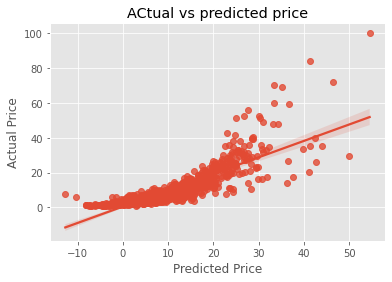

In [ ]:
#graph showing the best fit line
sns.regplot(x=y_pred, y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel('Actual Price')
plt.title("ACtual vs predicted price")
plt.show()